<a href="https://colab.research.google.com/github/TsaiShih/nci-research-project/blob/main/Research_Project_TsaiShih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob


from prettytable import PrettyTable
import collections

import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from skimage import io #read single image
from keras.utils.vis_utils import plot_model

#From Kaggle loading datasets

In [ ]:
#Please upload the kaggle.json from your kaggle account
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#connect to Kaggle Public API
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Create Osteoarthritis and Osteoporosis folders
!mkdir Osteoarthritis Osteoporosis
#Download two datasets from kaggle
! kaggle datasets download stevepython/osteoporosis-knee-xray-dataset
! kaggle datasets download tommyngx/digital-knee-xray
#unzip data to the folder
! unzip osteoporosis-knee-xray-dataset -d Osteoporosis
! unzip digital-knee-xray -d Osteoarthritis

 98% 274M/280M [00:10<00:00, 22.2MB/s]
100% 280M/280M [00:10<00:00, 29.2MB/s]
 98% 114M/117M [00:05<00:00, 26.9MB/s]
100% 117M/117M [00:05<00:00, 23.9MB/s]
Archive:  osteoporosis-knee-xray-dataset.zip
  inflating: Osteoporosis/normal/normal/10.png  
  inflating: Osteoporosis/normal/normal/101.jpg  
  inflating: Osteoporosis/normal/normal/104.jpg  
  inflating: Osteoporosis/normal/normal/107.jpg  
  inflating: Osteoporosis/normal/normal/11.jpg  
  inflating: Osteoporosis/normal/normal/110.jpg  
  inflating: Osteoporosis/normal/normal/115n.JPEG  
  inflating: Osteoporosis/normal/normal/118n.JPEG  
  inflating: Osteoporosis/normal/normal/11nn.png  
  inflating: Osteoporosis/normal/normal/12.png  
  inflating: Osteoporosis/normal/normal/123.png  
  inflating: Osteoporosis/normal/normal/125.jpg  
  inflating: Osteoporosis/normal/normal/128.jpg  
  inflating: Osteoporosis/normal/normal/13.png  
  inflating: Osteoporosis/normal/normal/131.jpg  
  inflating: Osteoporosis/normal/normal/132.png 

#Get the data path and quick look of datasets

In [ ]:
import glob

batch_size = 16
image_size = 224

OA_path = '/content/Osteoarthritis/MedicalExpert-I/'
OS_path = '/content/Osteoporosis/'
OA = glob.glob('/content/Osteoarthritis/MedicalExpert-I/*/*')
OS = glob.glob('/content/Osteoporosis/*/*/'+'*.png') + glob.glob('/content/Osteoporosis/*/*/'+'*.jpeg') + glob.glob('/content/Osteoporosis/*/*/'+'*.jpg')

In [ ]:
datagen_normal = ImageDataGenerator(rescale = 1/255)

batch_size = 32
image_size = 224

OA = datagen_normal.flow_from_directory(OA_path,
                                        target_size = (image_size, image_size),
                                        batch_size = batch_size ,
                                        class_mode = 'categorical')

class_names = OA.class_indices
print(class_names)

datagen_normal = ImageDataGenerator(rescale = 1/255)

OS = datagen_normal.flow_from_directory(OS_path,
                                        target_size = (image_size, image_size),
                                        batch_size = batch_size ,
                                        class_mode = 'categorical')
class_names = OS.class_indices
print(class_names)

Found 1650 images belonging to 5 classes.
{'0Normal': 0, '1Doubtful': 1, '2Mild': 2, '3Moderate': 3, '4Severe': 4}
Found 372 images belonging to 2 classes.
{'normal': 0, 'osteoporosis': 1}


#Split the dataset to train, valid and test folders

In [ ]:
import os
import shutil
source_folder = r"/content/Osteoporosis/normal/normal//"
destination_folder = r"/content/Osteoporosis/normal//"
random.seed(42)
# fetch all files
for file_name in os.listdir(source_folder):

    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # move only files
    if os.path.isfile(source):
        shutil.move(source, destination)
        print('Moved:', file_name)
shutil.rmtree("/content/Osteoporosis/normal/normal//")

source_folder = r"/content/Osteoporosis/osteoporosis/osteoporosis//"
destination_folder = r"/content/Osteoporosis/osteoporosis//"
random.seed(42)
# fetch all files
for file_name in os.listdir(source_folder):

    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # move only files
    if os.path.isfile(source):
        shutil.move(source, destination)
        print('Moved:', file_name)
shutil.rmtree("/content/Osteoporosis/osteoporosis/osteoporosis//")

Moved: 86.jpg
Moved: 56n.jpg
Moved: 164n.png
Moved: 180n.png
Moved: 7.jpg
Moved: 230n.png
Moved: 315n.jpg
Moved: 37.jpg
Moved: 50.jpg
Moved: 204n.png
Moved: 259n.png
Moved: 265n.png
Moved: 225.jpg
Moved: 14.png
Moved: 45.jpg
Moved: 168n.png
Moved: 55.jpg
Moved: 48.jpg
Moved: 137.jpg
Moved: 12.png
Moved: 285n.jpg
Moved: 30.png
Moved: 110.jpg
Moved: 172n.png
Moved: 4.png
Moved: 5.png
Moved: 275n.JPEG
Moved: 311n.jpg
Moved: 53.jpg
Moved: 29.JPEG
Moved: 25.JPEG
Moved: 140.png
Moved: 33nn.JPEG
Moved: 70n.JPEG
Moved: 303n.jpg
Moved: 42.jpg
Moved: 118n.JPEG
Moved: 205n.jpg
Moved: 87.png
Moved: 28.JPEG
Moved: 170n.png
Moved: 41.jpg
Moved: 200n.png
Moved: 35.jpg
Moved: 39.jpg
Moved: 49.jpg
Moved: 36n.jpg
Moved: 267n.png
Moved: 14nn.jpg
Moved: 313n.jpg
Moved: 123.png
Moved: 286n.jpg
Moved: n19.jpg
Moved: 194n.png
Moved: 57n.png
Moved: 68.jpg
Moved: 31.JPEG
Moved: 104.jpg
Moved: 174n.png
Moved: 40.jpg
Moved: 39n.png
Moved: 198n.png
Moved: 176n.png
Moved: 202n.png
Moved: 20.png
Moved: 57.jpg
Moved

In [ ]:
#Split the Osteoarthritis and Osteoporosis dataset to train, valid and test 0.7, 0.2, 0.1
!pip install split-folders
import splitfolders

# Split Osteoarthritis dataset
input_folder = '/content/Osteoarthritis/MedicalExpert-I/'
output_folder= '/content/Osteoarthritis/'
splitfolders.ratio(input_folder, output= output_folder, seed=42, ratio = (0.7, 0.2, 0.1))

# Split Osteoporosis dataset
input_folder = '/content/Osteoporosis/'
output_folder= '/content/Osteoporosis/'
splitfolders.ratio(input_folder, output= output_folder, seed=42, ratio = (0.7, 0.2, 0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1650 files [00:00, 7474.04 files/s]
Copying files: 372 files [00:00, 1105.85 files/s]


# Check OA and OS images in each folders

In [ ]:
#Get the Osteoarthritis train, valid and test folder path and check the amont of data images

oa_train_images = tf.io.gfile.glob('../content/Osteoarthritis/train/*/*')
oa_valid_images = tf.io.gfile.glob('../content/Osteoarthritis/val/*/*')
oa_test_images = tf.io.gfile.glob('../content/Osteoarthritis/test/*/*')

# Check images in each folders
print(f'OA dataset division of 70:20:10')
print(f'Total number of training images = {len(oa_train_images)}')
print(f'Total number of validation images = {len(oa_valid_images)}')
print(f'Total number of test images = {len(oa_test_images)}\n')

# Merge the train and validation and test to see the total images
total_files = oa_train_images
total_files.extend(oa_valid_images)
total_files.extend(oa_test_images)
print(f'Total number of images : train_images + valid_images + test_images  = {len(total_files)}\n')

OA dataset division of 70:20:10
Total number of training images = 1152
Total number of validation images = 328
Total number of test images = 170

Total number of images : train_images + valid_images + test_images  = 1650



In [ ]:
#Get the Osteoporosis train, valid and test folder path and check the amont of data images
os_train_images = tf.io.gfile.glob('../content/Osteoporosis/train/*/*')
os_valid_images = tf.io.gfile.glob('../content/Osteoporosis/val/*/*')
os_test_images = tf.io.gfile.glob('../content/Osteoporosis/test/*/*')

# Check images in each folders
print(f'OS dataset division of 70:20:10')
print(f'Total number of training images = {len(os_train_images)}')
print(f'Total number of validation images = {len(os_valid_images)}')
print(f'Total number of test images = {len(os_test_images)}\n')

# Check the total images
total_files = os_train_images
total_files.extend(os_valid_images)
total_files.extend(os_test_images)
print(f'Total number of images : train_images + valid_images + test_images  = {len(total_files)}\n')

OS dataset division of 70:20:10
Total number of training images = 260
Total number of validation images = 74
Total number of test images = 38

Total number of images : train_images + valid_images + test_images  = 372



#Extract images by for loop

In [ ]:
from glob import glob # return all file paths

#Get the data from OA each classes path
OA_0 = glob('/content/Osteoarthritis/MedicalExpert-I/0Normal/*')
OA_1 = glob('/content/Osteoarthritis/MedicalExpert-I/1Doubtful/*')
OA_2 = glob('/content/Osteoarthritis/MedicalExpert-I/2Mild/*')
OA_3 = glob('/content/Osteoarthritis/MedicalExpert-I/3Moderate/*')
OA_4 = glob('/content/Osteoarthritis/MedicalExpert-I/4Severe/*')

# This use for stacking data of OA classes
OA_2b = glob('/content/Osteoarthritis/MedicalExpert-I/2Mild/*') + glob('/content/Osteoarthritis/MedicalExpert-I/2Mild/*')
OA_3b = glob('/content/Osteoarthritis/MedicalExpert-I/3Moderate/*') + glob('/content/Osteoarthritis/MedicalExpert-I/3Moderate/*')
OA_4b = glob('/content/Osteoarthritis/MedicalExpert-I/4Severe/*') + glob('/content/Osteoarthritis/MedicalExpert-I/4Severe/*')

oa_data = [OA_0,OA_1,OA_2,OA_3,OA_4] # original OA data
oab_data = [OA_0,OA_1,OA_2b,OA_3b,OA_4b] #stacked OA data
oa_label = ['OA_0_Normal','OA_1_Doubtful','OA_2_Mild','OA_3_Moderate','OA_4_Severe']

#Get the OS data from each classes path
normal_knee = glob('/content/Osteoporosis/normal/*')
Osteoporosis = glob('/content/Osteoporosis/osteoporosis/*')

# OS data and labels name
os_data = [normal_knee, Osteoporosis]
os_label = ['normal_knee','Osteoporosis']

In [ ]:
#Getting images and labels to array function
def data_separate_label(data,label,size):
  df=[]
  labs=[]
  j = 0
  for i in label:
      if label.index(i)==j:
        for k in range(len(data[j])):
          img = cv2.imread(data[j][k])
          img = cv2.resize(img,(size,size))
          df.append(img)
          labs.append(label.index(i))
      j=j+1
  df=np.array(df)
  labs=np.array(labs)
  return df,labs



from sklearn.model_selection import train_test_split
#The ratio decide to split
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.10

#Train, Validation, and Test data split function
def train_test_valid_split(data_X, data_Y, validation = True):
  do_validation = validation
  if do_validation==True:
    x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=1 - train_ratio, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)
    return  x_train, y_train, x_val, y_val, x_test, y_test

  else:
    x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=test_ratio, random_state=42)
    return  x_train, y_train, x_test, y_test

#Use pretty table show the data information
def show_data_table(table_name, data_label, train_label,valid_label, test_label):
  # Specify the Column Names while initializing the Table
  myTable = PrettyTable(["Type", "Training Dataset","Validation Dataset","Testing Dataset"],
                     title = f"The composition of {table_name} X-ray dataset")
  for i in range(len(data_label)):
    myTable.add_row([data_label[i],
                    str(collections.Counter(train_label)[i]) + " (" + str(round(collections.Counter(train_label)[i]/len(train_label)*100,1)) + "%)" ,
                    str(collections.Counter(valid_label)[i]) + " (" +  str(round(collections.Counter(valid_label)[i]/len(valid_label)*100,1)) + "%)",
                    str(collections.Counter(test_label)[i]) + " (" +  str(round(collections.Counter(test_label)[i]/len(test_label)*100,1)) + "%)"])

  myTable.add_row(["Total images",
                   str(len(train_label)) + " (" +  str(round(len(train_label)/len(train_label)*100,1)) + "%)",
                   str(len(valid_label)) + " (" +  str(round(len(valid_label)/len(valid_label)*100,1)) + "%)",
                   str(len(test_label)) + " (" +  str(round(len(test_label)/len(test_label)*100,1)) + "%)"])
  print(myTable)

#Get the countplot of data with each classes
def EDA_data(train_label,valid_label,test_label,valid=True):
  plt.figure(figsize = (17,8));
  if valid:
    lis = ['Train','Valid','Test']
    for i,j in enumerate([train_label,valid_label, test_label]):
      plt.subplot(1,3, i+1);
      ax = sns.countplot(x = j);
      for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5),size = 15)
      plt.xlabel(lis[i])
  else:
    lis = ['Train', 'Test']
    for i,j in enumerate([train_label, test_label]):
      plt.subplot(1,3, i+1);
      ax = sns.countplot(x = j);
      plt.xlabel(lis[i])
      for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5),size = 15)
      plt.xlabel(lis[i])

#This function can show 5 images from the image array
def show_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#OA dataset

In [ ]:
oa,oa_l=data_separate_label(oa_data,oa_label,224)
oab,oab_l=data_separate_label(oab_data,oa_label,224)

In [ ]:
train_oa,train_oa_l,valid_oa,valid_oa_l,test_oa,test_oa_l=train_test_valid_split(oa,oa_l, True)

+-------------------------------------------------------------------------+
|               The composition of OA severity X-ray dataset              |
+---------------+------------------+--------------------+-----------------+
|      Type     | Training Dataset | Validation Dataset | Testing Dataset |
+---------------+------------------+--------------------+-----------------+
|  OA_0_Normal  |   361 (31.3%)    |    102 (30.9%)     |    51 (30.7%)   |
| OA_1_Doubtful |   342 (29.6%)    |     90 (27.3%)     |    45 (27.1%)   |
|   OA_2_Mild   |   157 (13.6%)    |     46 (13.9%)     |    29 (17.5%)   |
| OA_3_Moderate |   148 (12.8%)    |     54 (16.4%)     |    19 (11.4%)   |
|  OA_4_Severe  |   146 (12.7%)    |     38 (11.5%)     |    22 (13.3%)   |
|  Total images |  1154 (100.0%)   |    330 (100.0%)    |   166 (100.0%)  |
+---------------+------------------+--------------------+-----------------+


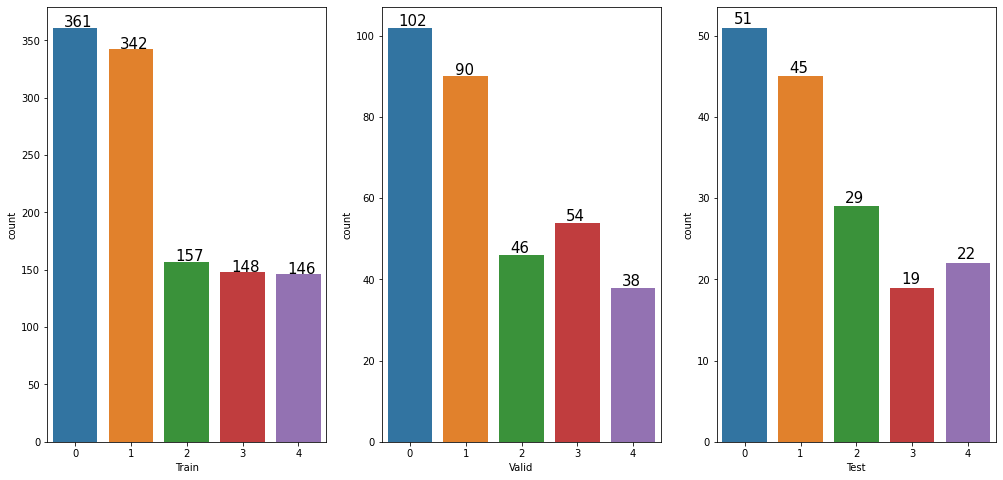

In [ ]:
show_data_table("OA severity",oa_label,train_oa_l,valid_oa_l,test_oa_l)
EDA_data(train_oa_l,valid_oa_l,test_oa_l,True)

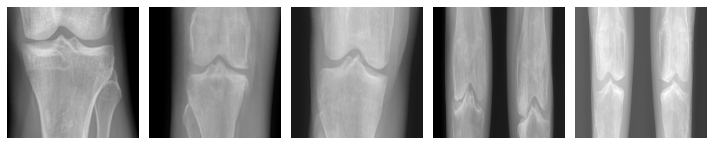

In [ ]:
show_images(train_oa)

##CNN section

###Functions

In [ ]:
from keras import models
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#(Bany Muhammad et al., 2019 Network architecture of the base model-2.)
def CNN_Structure_1(data_label,activation="relu"):
  n_class = len(pd.Categorical(data_label).categories)
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(224, 224, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(96, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  #Convert the matrix to a fully connected layer
  model.add(layers.Flatten())
  model.add(Dropout(0.1))
  #Final dense convert to classes
  model.add(layers.Dense(n_class, activation='softmax'))
  #Model compile
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

#(Nafiiyah and Setyati, 2021 CNN 35 Layers Architecture )
def CNN_Structure_2(data_label,activation="relu"):
  n_class = len(pd.Categorical(data_label).categories)
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(224, 224, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((1, 1)))
  model.add(layers.Conv2D(256, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((1, 1)))
  model.add(layers.Flatten())
  model.add(layers.Dense(n_class, activation='softmax'))
  #Model compile
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model


def CNN_Structure_3(data_label,activation="relu"):
  n_class = len(pd.Categorical(data_label).categories)
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(224, 224, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=activation))
  #Convert the matrix to a fully connected layer
  model.add(layers.Flatten())
  #Add dense layers
  model.add(layers.Dense(256, activation="relu"))
  model.add(layers.Dense(512, activation="relu"))
  #Final dense convert to classes
  model.add(layers.Dense(n_class, activation='softmax'))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

#These function can test different epochs of CNN model
def CNN_Model(model,train_data, train_label,valid_data,valid_label, epochs):
  random.seed(42)
  history = model.fit(train_data, train_label, epochs=epochs, validation_data=(valid_data, valid_label),verbose=0)
  return history

#This function can add the class_weight parameters and adjust epochs
def CNN_Model_w(model,train_data, train_label,valid_data,valid_label, epochs, class_weight):
  random.seed(42)
  history = model.fit(train_data, train_label, epochs=epochs,class_weight = class_weight, validation_data=(valid_data, valid_label),verbose=0)
  return history

#Show the epochs with accuracy relation plot
def acc_plot(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax = ax.ravel()

  for i, met in enumerate(['accuracy', 'loss']):
      ax[i].plot(history.history[met])
      ax[i].plot(history.history['val_' + met])
      ax[i].set_title('Model {}'.format(met))
      ax[i].set_xlabel('epochs')
      ax[i].set_ylabel(met)
      ax[i].legend(['train', 'val'])


#This show_matrix funciton can show confusion matrix by heatmap
def show_matrix(model,test_data,test_data_label,label_names):
    predict=model.predict(test_data)
    predict_labels=np.argmax(predict,axis=1)
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(test_data_label,predict_labels)

    plt.figure(figsize = (8,6))
    ax = sns.heatmap(cf_matrix, annot=True, annot_kws={'size': 20}, cmap='Blues',fmt='g')

    ax.set_title('Confusion Matrix',size= 20);
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual');
    ax.xaxis.set_ticklabels(label_names,size=10)
    ax.yaxis.set_ticklabels(label_names,size=10, rotation=45)
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("\n")

#This funciton can show print the information of matrix
from sklearn.metrics import classification_report
def matrix_info(model,test_data,test_label):
  test_pred=np.argmax(model.predict(test_data),axis=1)
  print(f"\n{classification_report(test_label,test_pred)}")



###CNN model structure comparison

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


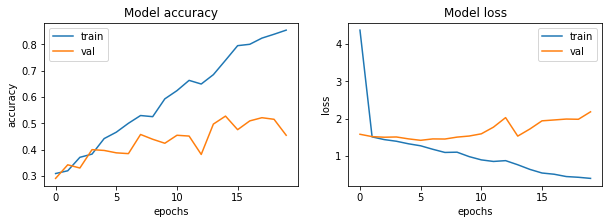

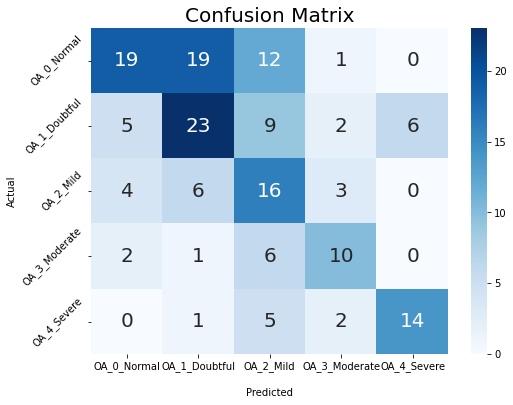




              precision    recall  f1-score   support

           0       0.63      0.37      0.47        51
           1       0.46      0.51      0.48        45
           2       0.33      0.55      0.42        29
           3       0.56      0.53      0.54        19
           4       0.70      0.64      0.67        22

    accuracy                           0.49       166
   macro avg       0.54      0.52      0.52       166
weighted avg       0.53      0.49      0.50       166



/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


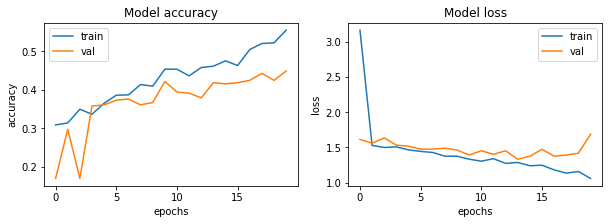

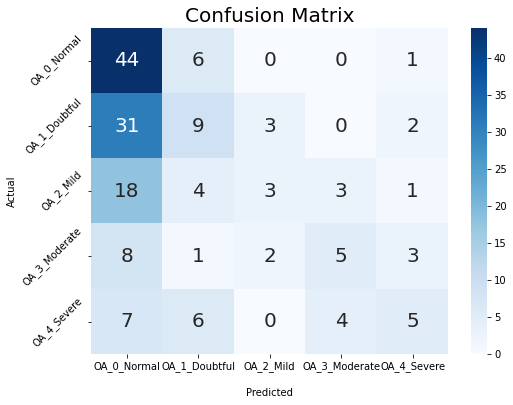




              precision    recall  f1-score   support

           0       0.41      0.86      0.55        51
           1       0.35      0.20      0.25        45
           2       0.38      0.10      0.16        29
           3       0.42      0.26      0.32        19
           4       0.42      0.23      0.29        22

    accuracy                           0.40       166
   macro avg       0.39      0.33      0.32       166
weighted avg       0.39      0.40      0.34       166



/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


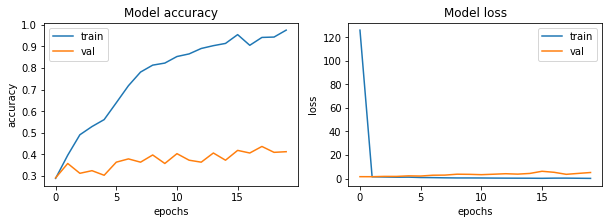

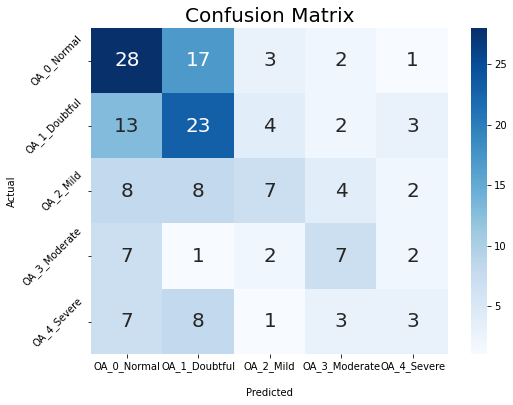




              precision    recall  f1-score   support

           0       0.44      0.55      0.49        51
           1       0.40      0.51      0.45        45
           2       0.41      0.24      0.30        29
           3       0.39      0.37      0.38        19
           4       0.27      0.14      0.18        22

    accuracy                           0.41       166
   macro avg       0.38      0.36      0.36       166
weighted avg       0.40      0.41      0.39       166



In [ ]:
#CNN structure 1
oa_cnn_model1 = CNN_Structure_1(train_oa_l,"relu")
oa_history1 = CNN_Model(oa_cnn_model1,train_oa,train_oa_l,valid_oa,valid_oa_l,20)
acc_plot(oa_history1)
show_matrix(oa_cnn_model1,test_oa,test_oa_l,oa_label)
matrix_info(oa_cnn_model1,test_oa,test_oa_l)

#CNN structure 2
oa_cnn_model2 = CNN_Structure_2(train_oa_l,"relu")
oa_history2 = CNN_Model(oa_cnn_model2,train_oa,train_oa_l,valid_oa,valid_oa_l,20)
acc_plot(oa_history2)
show_matrix(oa_cnn_model2,test_oa,test_oa_l,oa_label)
matrix_info(oa_cnn_model2,test_oa,test_oa_l)

#CNN structure 3
oa_cnn_model3 = CNN_Structure_3(train_oa_l,"relu")
oa_history3 = CNN_Model(oa_cnn_model3,train_oa,train_oa_l,valid_oa,valid_oa_l,20)
acc_plot(oa_history3)
show_matrix(oa_cnn_model3,test_oa,test_oa_l,oa_label)
matrix_info(oa_cnn_model3,test_oa,test_oa_l)

### Imbalance stack data method with CNN Structure 1

In [ ]:
train_oab,train_oab_l,valid_oab,valid_oab_l,test_oab,test_oab_l =train_test_valid_split(oab,oab_l, True)

+-------------------------------------------------------------------------+
|               The composition of OA severity X-ray dataset              |
+---------------+------------------+--------------------+-----------------+
|      Type     | Training Dataset | Validation Dataset | Testing Dataset |
+---------------+------------------+--------------------+-----------------+
|  OA_0_Normal  |   348 (21.5%)    |    109 (23.6%)     |    57 (24.7%)   |
| OA_1_Doubtful |   338 (20.9%)    |     95 (20.6%)     |    44 (19.0%)   |
|   OA_2_Mild   |   328 (20.3%)    |     91 (19.7%)     |    45 (19.5%)   |
| OA_3_Moderate |   320 (19.8%)    |     79 (17.1%)     |    43 (18.6%)   |
|  OA_4_Severe  |   282 (17.5%)    |     88 (19.0%)     |    42 (18.2%)   |
|  Total images |  1616 (100.0%)   |    462 (100.0%)    |   231 (100.0%)  |
+---------------+------------------+--------------------+-----------------+


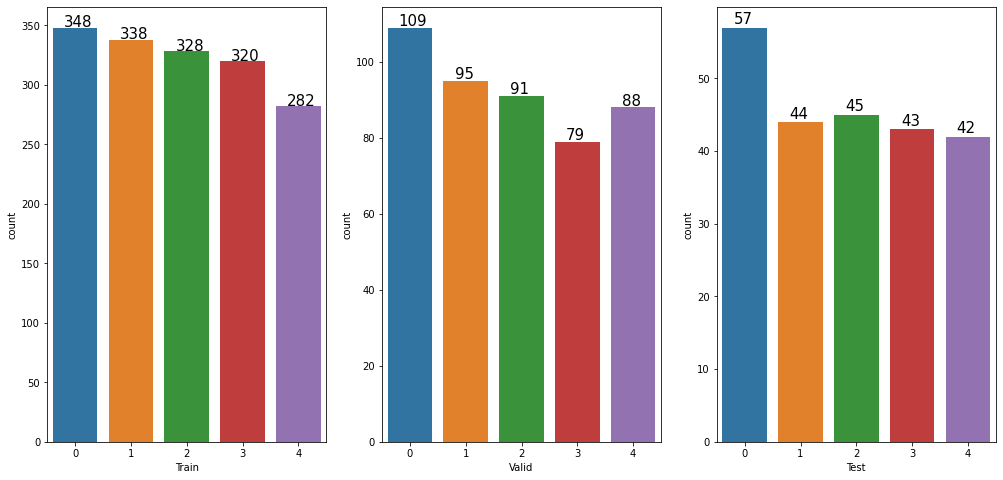

In [ ]:
show_data_table("OA severity",oa_label,train_oab_l,valid_oab_l,test_oab_l)
EDA_data(train_oab_l,valid_oab_l,test_oab_l,True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


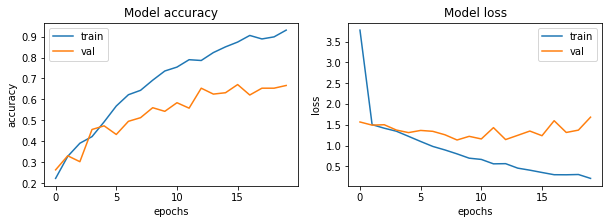

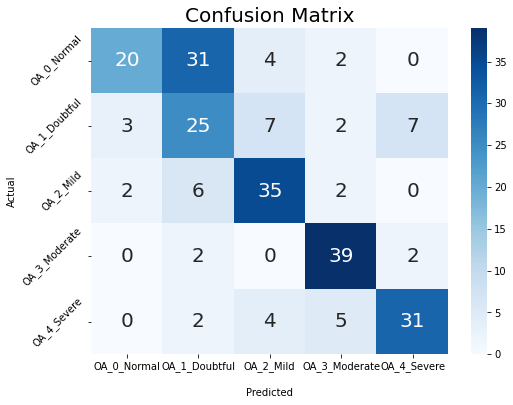




              precision    recall  f1-score   support

           0       0.80      0.35      0.49        57
           1       0.38      0.57      0.45        44
           2       0.70      0.78      0.74        45
           3       0.78      0.91      0.84        43
           4       0.78      0.74      0.76        42

    accuracy                           0.65       231
   macro avg       0.69      0.67      0.65       231
weighted avg       0.69      0.65      0.64       231



In [ ]:
#CNN structure 1 with oab
oab_cnn_model = CNN_Structure_1(train_oab_l,"relu")
oab_history = CNN_Model(oab_cnn_model,train_oab,train_oab_l,valid_oab,valid_oab_l,20)
acc_plot(oab_history)
show_matrix(oab_cnn_model,test_oab,test_oab_l,oa_label)
matrix_info(oab_cnn_model,test_oab,test_oab_l)

###Imbalance class weight method

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight # This can help to compute the class weight

#Get class weights from data labels
def generate_class_weights(data_labels):
  unique_labels = np.unique(data_labels)
  class_weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=data_labels)
  return dict(zip(unique_labels, class_weights))

In [ ]:
oa_class_weight=generate_class_weights(train_oa_l)
oa_class_weight

{0: 0.6393351800554017,
 1: 0.6748538011695906,
 2: 1.4700636942675158,
 3: 1.5594594594594595,
 4: 1.5808219178082192}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


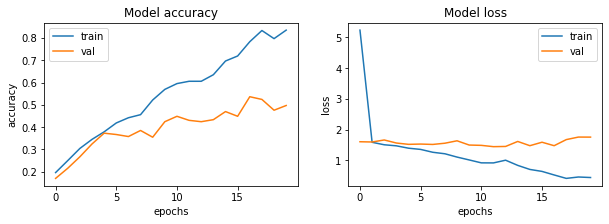

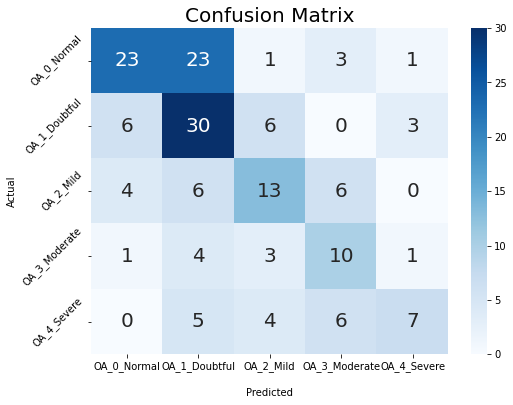




              precision    recall  f1-score   support

           0       0.68      0.45      0.54        51
           1       0.44      0.67      0.53        45
           2       0.48      0.45      0.46        29
           3       0.40      0.53      0.45        19
           4       0.58      0.32      0.41        22

    accuracy                           0.50       166
   macro avg       0.52      0.48      0.48       166
weighted avg       0.53      0.50      0.50       166



In [ ]:
#structure 1 with oa weight
oaw_cnn_model = CNN_Structure_1(train_oa_l,"relu")
oaw_history = CNN_Model_w(oaw_cnn_model,train_oa,train_oa_l,valid_oa,valid_oa_l,20,oa_class_weight)
acc_plot(oaw_history)
show_matrix(oaw_cnn_model,test_oa,test_oa_l,oa_label)
matrix_info(oaw_cnn_model,test_oa,test_oa_l)

###Imbalance stack + class weight method

In [ ]:
oab_class_weight=generate_class_weights(train_oab_l)
oab_class_weight

{0: 0.9287356321839081,
 1: 0.9562130177514793,
 2: 0.9853658536585366,
 3: 1.01,
 4: 1.146099290780142}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


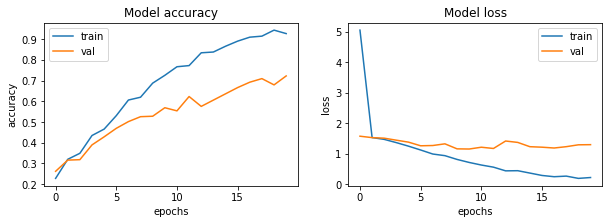

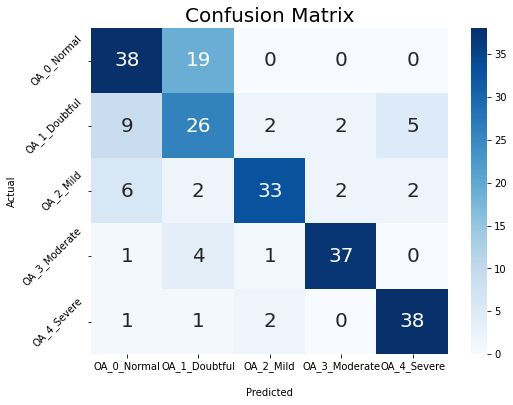




              precision    recall  f1-score   support

           0       0.69      0.67      0.68        57
           1       0.50      0.59      0.54        44
           2       0.87      0.73      0.80        45
           3       0.90      0.86      0.88        43
           4       0.84      0.90      0.87        42

    accuracy                           0.74       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.76      0.74      0.75       231



In [ ]:
#CNN structure 1 with oab + weight epoch 20
oabw_cnn_model = CNN_Structure_1(train_oab_l,"relu")
oabw_history = CNN_Model_w(oabw_cnn_model,train_oab,train_oab_l,valid_oab,valid_oab_l,20,oab_class_weight)
acc_plot(oabw_history)
show_matrix(oabw_cnn_model,test_oab,test_oab_l,oa_label)
matrix_info(oabw_cnn_model,test_oab,test_oab_l)

###CNN structure 1 with oab + weight epoch EPOCH comparison

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


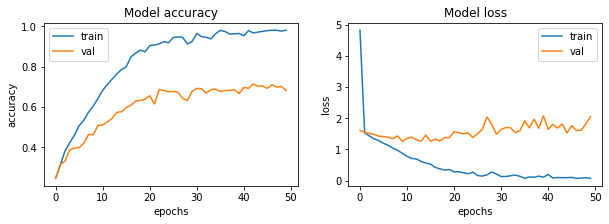

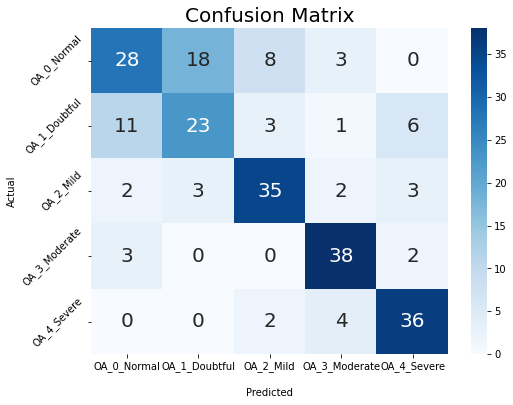




              precision    recall  f1-score   support

           0       0.64      0.49      0.55        57
           1       0.52      0.52      0.52        44
           2       0.73      0.78      0.75        45
           3       0.79      0.88      0.84        43
           4       0.77      0.86      0.81        42

    accuracy                           0.69       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
#CNN structure 1 with oab + weight epoch 50
oawb_cnn_model_e50 = CNN_Structure_1(train_oab_l,"relu")
oawb_history_e50 = CNN_Model_w(oawb_cnn_model_e50,train_oab,train_oab_l,valid_oab,valid_oab_l,50,oab_class_weight)
acc_plot(oawb_history_e50)
show_matrix(oawb_cnn_model_e50,test_oab,test_oab_l,oa_label)
matrix_info(oawb_cnn_model_e50,test_oab,test_oab_l)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


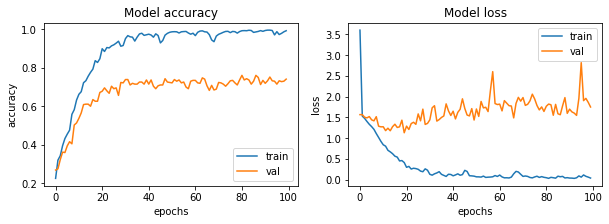

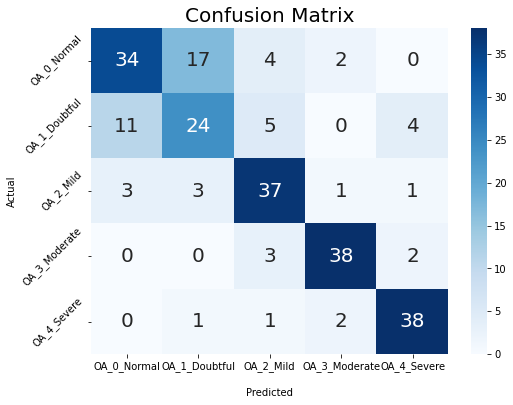




              precision    recall  f1-score   support

           0       0.71      0.60      0.65        57
           1       0.53      0.55      0.54        44
           2       0.74      0.82      0.78        45
           3       0.88      0.88      0.88        43
           4       0.84      0.90      0.87        42

    accuracy                           0.74       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
#CNN structure 1 with oab + weight epoch 100
oawb_cnn_model_e100 = CNN_Structure_1(train_oab_l,"relu")
oawb_history_e100 = CNN_Model_w(oawb_cnn_model_e100,train_oab,train_oab_l,valid_oab,valid_oab_l,100,oab_class_weight)
acc_plot(oawb_history_e100)
show_matrix(oawb_cnn_model_e100,test_oab,test_oab_l,oa_label)
matrix_info(oawb_cnn_model_e100,test_oab,test_oab_l)

##VGG16 Section

In [ ]:
oa,oa_l=data_separate_label(oa_data,oa_label,224)

In [ ]:
train_oa,train_oa_l,valid_oa,valid_oa_l,test_oa,test_oa_l=train_test_valid_split(oa,oa_l, True)

In [ ]:
oa_class_weight=generate_class_weights(train_oa_l)
oa_class_weight

{0: 0.6393351800554017,
 1: 0.6748538011695906,
 2: 1.4700636942675158,
 3: 1.5594594594594595,
 4: 1.5808219178082192}

In [ ]:
oab_class_weight=generate_class_weights(train_oab_l)
oab_class_weight

{0: 0.9287356321839081,
 1: 0.9562130177514793,
 2: 0.9853658536585366,
 3: 1.01,
 4: 1.146099290780142}

In [ ]:
#Get the Basic VGG16 structure
from keras.applications.vgg16 import VGG16
def VGG16(data_label):
  n_class = len(pd.Categorical(data_label).categories)
  # Load the VGG16 Model
  base_VGG = tf.keras.applications.VGG16(input_shape=(image_size, image_size, 3),
                                       include_top=False,  # Do not include the ImageNet classifier at the top.
                                       weights='imagenet') # Load weights pre-trained on ImageNet.
  base_VGG.trainable = False # Freeze the base model

  # Add extra layers
  VGG = tf.keras.Sequential([
        base_VGG,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n_class,activation='sigmoid')
        ])

  VGG.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return VGG

def VGG16_Model_w(model,train_data, train_label,valid_data,valid_label, epochs, class_weight=None):
  history = model.fit(train_data, train_label, epochs=epochs, validation_data=(valid_data, valid_label),class_weight=class_weight,verbose=0)
  return history

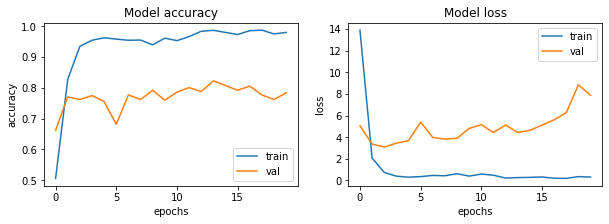

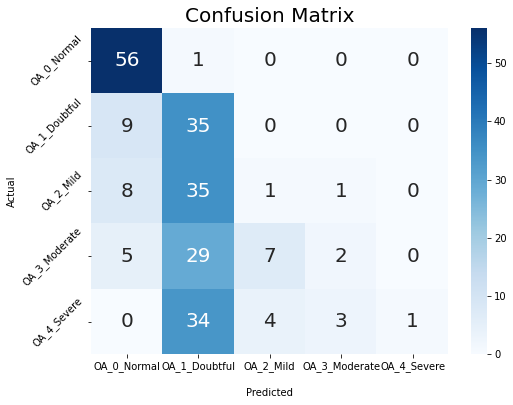




              precision    recall  f1-score   support

           0       0.72      0.98      0.83        57
           1       0.26      0.80      0.39        44
           2       0.08      0.02      0.04        45
           3       0.33      0.05      0.08        43
           4       1.00      0.02      0.05        42

    accuracy                           0.41       231
   macro avg       0.48      0.37      0.28       231
weighted avg       0.49      0.41      0.31       231



In [ ]:
#VGG16 with oab epoch 20
oab_vgg_model = VGG16(train_oab_l)
oab_vgg_history = VGG16_Model_w(oab_vgg_model,train_oab, train_oab_l,valid_oab, valid_oab_l,20)
acc_plot(oab_vgg_history)
show_matrix(oab_vgg_model,test_oab,test_oab_l,oa_label)
matrix_info(oab_vgg_model,test_oab,test_oab_l)

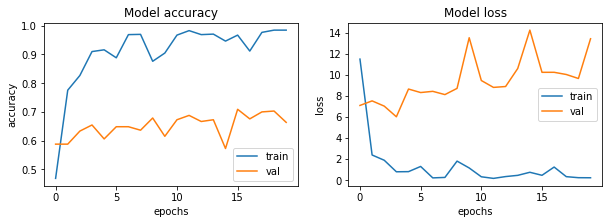

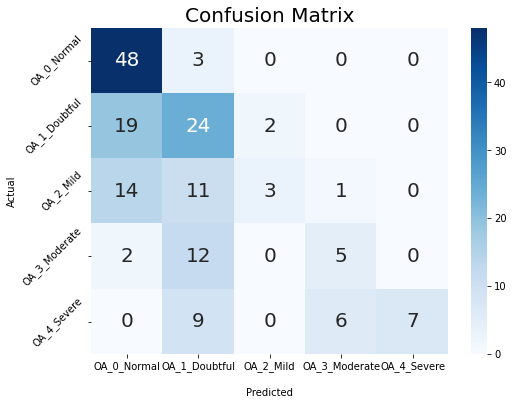




              precision    recall  f1-score   support

           0       0.58      0.94      0.72        51
           1       0.41      0.53      0.46        45
           2       0.60      0.10      0.18        29
           3       0.42      0.26      0.32        19
           4       1.00      0.32      0.48        22

    accuracy                           0.52       166
   macro avg       0.60      0.43      0.43       166
weighted avg       0.57      0.52      0.48       166



In [ ]:
#VGG16 with weight epoch 20
oaw_vgg_model = VGG16(train_oa_l)
oaw_vgg_history = VGG16_Model_w(oaw_vgg_model,train_oa, train_oa_l,valid_oa, valid_oa_l,20,oa_class_weight)
acc_plot(oaw_vgg_history)
show_matrix(oaw_vgg_model,test_oa,test_oa_l,oa_label)
matrix_info(oaw_vgg_model,test_oa,test_oa_l)

58900480/58889256 [==============================] - 1s 0us/step


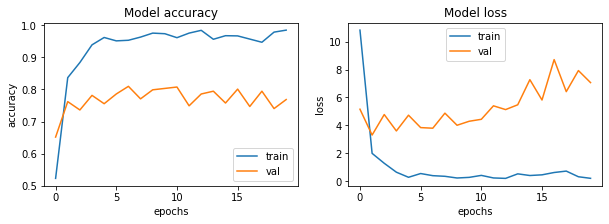

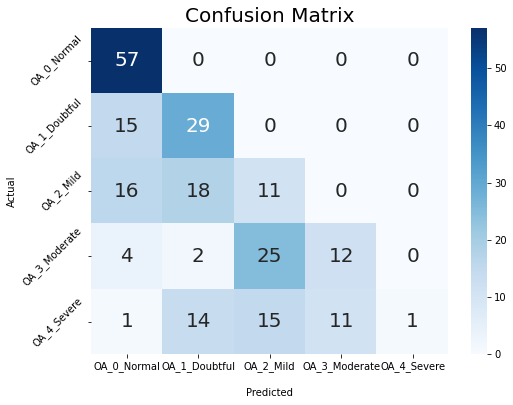




              precision    recall  f1-score   support

           0       0.61      1.00      0.76        57
           1       0.46      0.66      0.54        44
           2       0.22      0.24      0.23        45
           3       0.52      0.28      0.36        43
           4       1.00      0.02      0.05        42

    accuracy                           0.48       231
   macro avg       0.56      0.44      0.39       231
weighted avg       0.56      0.48      0.41       231



In [ ]:
#VGG16 with oab + weight epoch 20
oabw_vgg_model = VGG16(train_oab_l)
oabw_vgg_history = VGG16_Model_w(oabw_vgg_model,train_oab, train_oab_l,valid_oab, valid_oab_l,20,oab_class_weight)
acc_plot(oabw_vgg_history)
show_matrix(oabw_vgg_model,test_oab,test_oab_l,oa_label)
matrix_info(oabw_vgg_model,test_oab,test_oab_l)

###VGG16 + class weight Epoch comparison

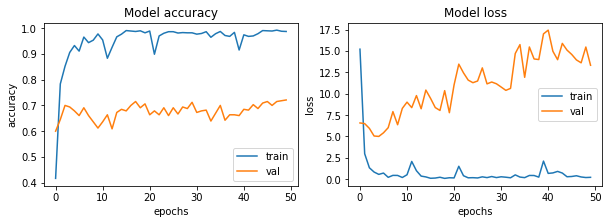

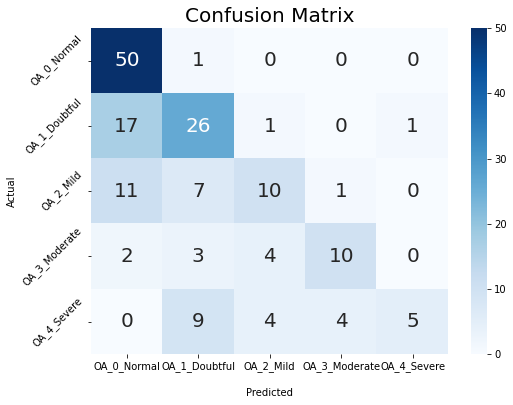




              precision    recall  f1-score   support

           0       0.62      0.98      0.76        51
           1       0.57      0.58      0.57        45
           2       0.53      0.34      0.42        29
           3       0.67      0.53      0.59        19
           4       0.83      0.23      0.36        22

    accuracy                           0.61       166
   macro avg       0.64      0.53      0.54       166
weighted avg       0.62      0.61      0.58       166



In [ ]:
#epoch 50
oaw_vgg_model_50 = VGG16(train_oa_l)
oaw_vgg_history_50 = VGG16_Model_w(oaw_vgg_model_50,train_oa, train_oa_l,valid_oa, valid_oa_l,50,oa_class_weight)
acc_plot(oaw_vgg_history_50)
show_matrix(oaw_vgg_model_50,test_oa,test_oa_l,oa_label)
matrix_info(oaw_vgg_model_50,test_oa,test_oa_l)

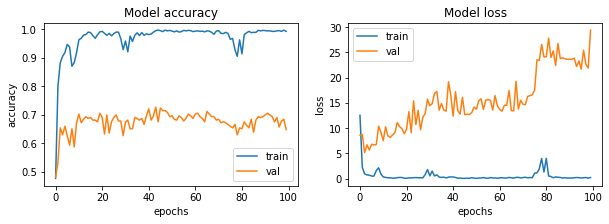

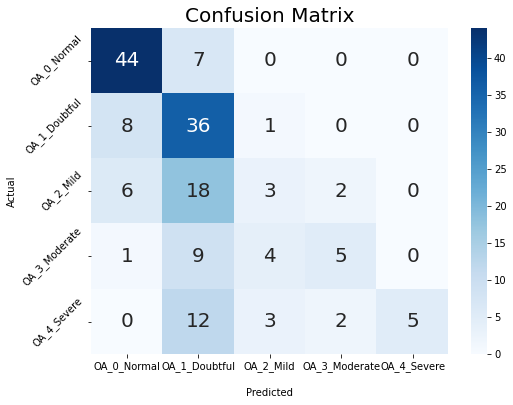




              precision    recall  f1-score   support

           0       0.75      0.86      0.80        51
           1       0.44      0.80      0.57        45
           2       0.27      0.10      0.15        29
           3       0.56      0.26      0.36        19
           4       1.00      0.23      0.37        22

    accuracy                           0.56       166
   macro avg       0.60      0.45      0.45       166
weighted avg       0.59      0.56      0.52       166



In [ ]:
#epoch 100
oaw_vgg_model_100 = VGG16(train_oa_l)
oaw_vgg_history_100 = VGG16_Model_w(oaw_vgg_model_100,train_oa, train_oa_l,valid_oa, valid_oa_l,100,oa_class_weight)
acc_plot(oaw_vgg_history_100)
show_matrix(oaw_vgg_model_100,test_oa,test_oa_l,oa_label)
matrix_info(oaw_vgg_model_100,test_oa,test_oa_l)

##Late-Fusion Section

In [ ]:
# Multiple Inputs
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

def Fusion_CNN_VGG16(data_label):
  n_class = len(pd.Categorical(data_label).categories)
  # Model A CNN structure 1
  input_1 = Input(shape=(224,224,3), name="Input_a")
  conv_1 = Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", name ="conv_layer_1")(input_1)
  pool1 = MaxPooling2D((2, 2), name ="MaxPool_1")(conv_1)
  conv_2 = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name ="conv_layer_2")(pool1)
  pool2 = MaxPooling2D((2, 2), name ="MaxPool_2")(conv_2)
  conv_3 = Conv2D(filters=96, kernel_size=(3,3), padding="same", activation="relu", name ="conv_layer_3")(pool2)
  pool3 = MaxPooling2D((2, 2), name ="MaxPool_3")(conv_3)
  conv_4 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name ="conv_layer_4")(pool3)
  pool4 = MaxPooling2D((2, 2), name ="MaxPool_4")(conv_4)
  conv_5 = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name ="conv_layer_5")(pool4)
  pool5 = MaxPooling2D((2, 2), name ="MaxPool_5")(conv_5)
  drop1=Dropout(0.1)(pool5)
  flat = layers.Flatten()(drop1)
  cnn=Dropout(0.1)(flat)

  # Model B VGG16
  input_2 = Input(shape=(224,224,3), name="Input_b")
  vgg_1 = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_1")(input_2)
  vgg_2 = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_2")(vgg_1)
  pool1 = MaxPooling2D((2, 2))(vgg_2)

  vgg_3 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_3")(pool1)
  vgg_4 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_4")(vgg_3)
  pool2 = MaxPooling2D((2, 2))(vgg_4)

  vgg_5 = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_5")(pool2)
  vgg_6 = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_6")(vgg_5)
  vgg_7 = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_7")(vgg_6)
  pool3 = MaxPooling2D((2, 2))(vgg_7)

  vgg_8 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_8")(pool3)
  vgg_9 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_9")(vgg_8)
  vgg_10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_10")(vgg_9)
  pool4 = MaxPooling2D((2, 2))(vgg_10)

  vgg_11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_11")(pool4)
  vgg_12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_12")(vgg_11)
  vgg_13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name ="vgg_layer_13")(vgg_12)
  pool5 = MaxPooling2D((2, 2))(vgg_13)

  flat = Flatten()(pool5)
  dense1 = Dense(4096, activation="relu",name ="vgg_layer_14")(flat)
  dense2 = Dense(4096, activation="relu",name ="vgg_layer_15")(dense1)
  dense3 = Dense(1000, activation="relu",name ="vgg_layer_16")(dense2)
  vgg = Flatten()(dense3)

  #Merging model A CNN structure 1 and B VGG16
  cnn_vgg = concatenate([cnn,vgg],name="concatenated_layer")
  #Final dense Layer
  output_layer = Dense(n_class, activation = "softmax", name = "output_layer")(cnn_vgg)
  #Model Definition with two inputs
  merged = Model(inputs=[(input_1,input_2)],outputs=[output_layer], name = "merged_model")
  #Model compile
  merged.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return merged

#This function can add the class_weight parameters and adjust epochs to run Fusion model
def Fusion_model_w(model,train_data, train_label,valid_data,valid_label, epochs, class_weight=None):
  random.seed(42)
  history = model.fit([train_data,train_data], train_label, epochs=epochs,class_weight =class_weight, validation_data=([valid_data,valid_data], valid_label),verbose=0)
  return history

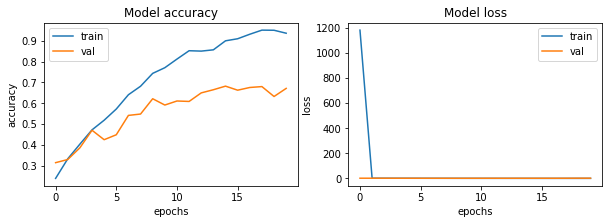

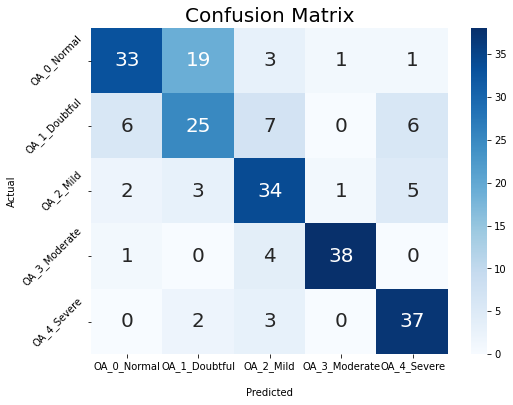




              precision    recall  f1-score   support

           0       0.79      0.58      0.67        57
           1       0.51      0.57      0.54        44
           2       0.67      0.76      0.71        45
           3       0.95      0.88      0.92        43
           4       0.76      0.88      0.81        42

    accuracy                           0.72       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.74      0.72      0.72       231



In [ ]:
#Fusion model oab epoch 20
oab_fusion_model = Fusion_CNN_VGG16(train_oab_l)
oab_fusion_history = Fusion_model_w(oab_fusion_model ,train_oab, train_oab_l,valid_oab, valid_oab_l,20)
acc_plot(oab_fusion_history)
show_matrix(oab_fusion_model,[test_oab,test_oab],test_oab_l,oa_label)
matrix_info(oab_fusion_model,[test_oab,test_oab],test_oab_l)

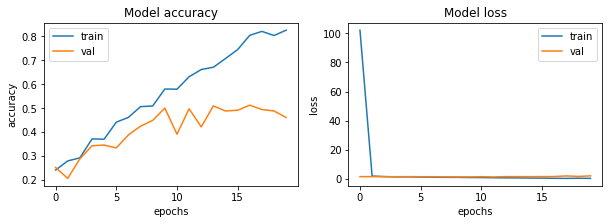

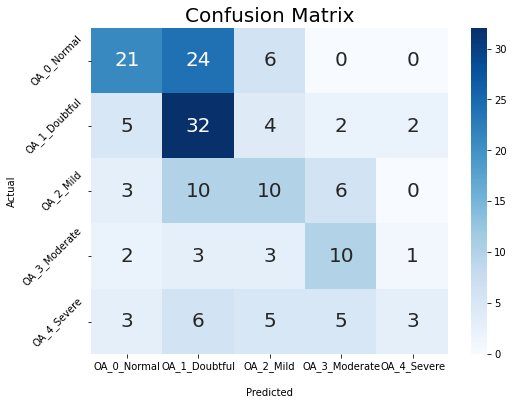




              precision    recall  f1-score   support

           0       0.62      0.41      0.49        51
           1       0.43      0.71      0.53        45
           2       0.36      0.34      0.35        29
           3       0.43      0.53      0.48        19
           4       0.50      0.14      0.21        22

    accuracy                           0.46       166
   macro avg       0.47      0.43      0.41       166
weighted avg       0.48      0.46      0.44       166



In [ ]:
#Fusion model class weight epoch 20
oa_fusion_model = Fusion_CNN_VGG16(train_oa_l)
oa_fusion_history = Fusion_model_w(oa_fusion_model ,train_oa, train_oa_l,valid_oa, valid_oa_l,20,oa_class_weight)
acc_plot(oa_fusion_history)
show_matrix(oa_fusion_model,[test_oa,test_oa],test_oa_l,oa_label)
matrix_info(oa_fusion_model,[test_oa,test_oa],test_oa_l)

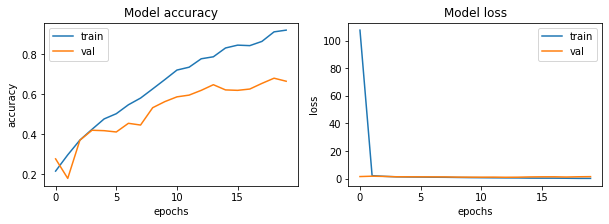

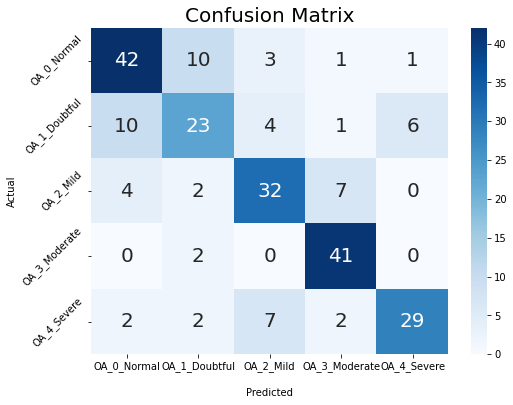




              precision    recall  f1-score   support

           0       0.72      0.74      0.73        57
           1       0.59      0.52      0.55        44
           2       0.70      0.71      0.70        45
           3       0.79      0.95      0.86        43
           4       0.81      0.69      0.74        42

    accuracy                           0.72       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.72      0.72      0.72       231



In [ ]:
#Fusion model oab + class weight epoch 20
oabw_fusion_model = Fusion_CNN_VGG16(train_oab_l)
oabw_fusion_history = Fusion_model_w(oabw_fusion_model ,train_oab, train_oab_l,valid_oab, valid_oab_l,20,oab_class_weight)
acc_plot(oabw_fusion_history)
show_matrix(oabw_fusion_model,[test_oab,test_oab],test_oab_l,oa_label)
matrix_info(oabw_fusion_model,[test_oab,test_oab],test_oab_l)

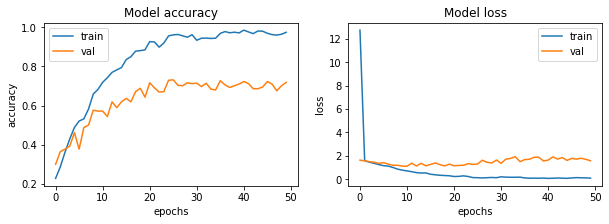

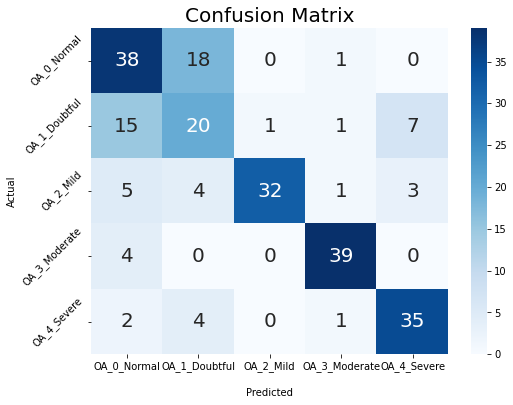




              precision    recall  f1-score   support

           0       0.59      0.67      0.63        57
           1       0.43      0.45      0.44        44
           2       0.97      0.71      0.82        45
           3       0.91      0.91      0.91        43
           4       0.78      0.83      0.80        42

    accuracy                           0.71       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.73      0.71      0.71       231



In [ ]:
#Epoch 50
oabw_fusion_model_50 = Fusion_CNN_VGG16(train_oab_l)
oabw_fusion_history_50 = Fusion_model_w(oabw_fusion_model_50 ,train_oab, train_oab_l,valid_oab, valid_oab_l,50,oab_class_weight)
acc_plot(oabw_fusion_history_50)
show_matrix(oabw_fusion_model_50,[test_oab,test_oab],test_oab_l,oa_label)
matrix_info(oabw_fusion_model_50,[test_oab,test_oab],test_oab_l)

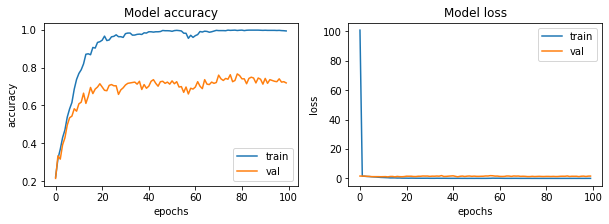

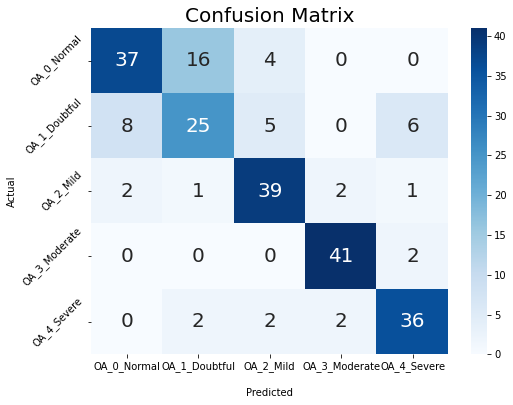




              precision    recall  f1-score   support

           0       0.79      0.65      0.71        57
           1       0.57      0.57      0.57        44
           2       0.78      0.87      0.82        45
           3       0.91      0.95      0.93        43
           4       0.80      0.86      0.83        42

    accuracy                           0.77       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
#Epoch 100
oabw_fusion_model_100 = Fusion_CNN_VGG16(train_oab_l)
oabw_fusion_history_100 = Fusion_model_w(oabw_fusion_model_100 ,train_oab, train_oab_l,valid_oab, valid_oab_l,100,oab_class_weight)
acc_plot(oabw_fusion_history_100)
show_matrix(oabw_fusion_model_100,[test_oab,test_oab],test_oab_l,oa_label)
matrix_info(oabw_fusion_model_100,[test_oab,test_oab],test_oab_l)

#OS dataset

In [ ]:
os,os_l=data_separate_label(os_data,os_label,224)

In [ ]:
train_os,train_os_l,valid_os,valid_os_l,test_os,test_os_l=train_test_valid_split(os,os_l, True)

+------------------------------------------------------------------------+
|                  The composition of OS X-ray dataset                   |
+--------------+------------------+--------------------+-----------------+
|     Type     | Training Dataset | Validation Dataset | Testing Dataset |
+--------------+------------------+--------------------+-----------------+
| normal_knee  |   129 (49.6%)    |     37 (50.0%)     |    20 (52.6%)   |
| Osteoporosis |   131 (50.4%)    |     37 (50.0%)     |    18 (47.4%)   |
| Total images |   260 (100.0%)   |    74 (100.0%)     |   38 (100.0%)   |
+--------------+------------------+--------------------+-----------------+


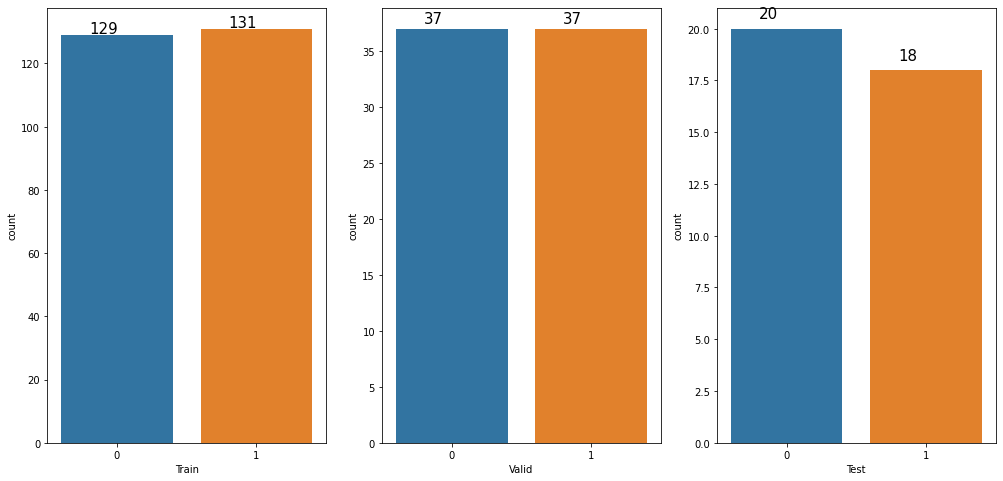

In [ ]:
show_data_table("OS",os_label,train_os_l,valid_os_l,test_os_l)
EDA_data(train_os_l,valid_os_l,test_os_l,True)

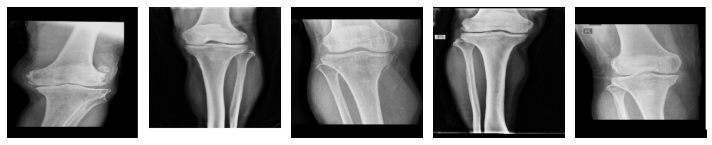

In [ ]:
show_images(train_os)

##CNN Section

###CNN model structure comparison

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


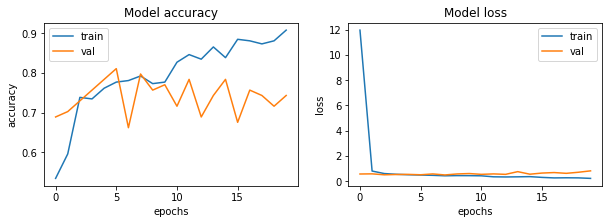

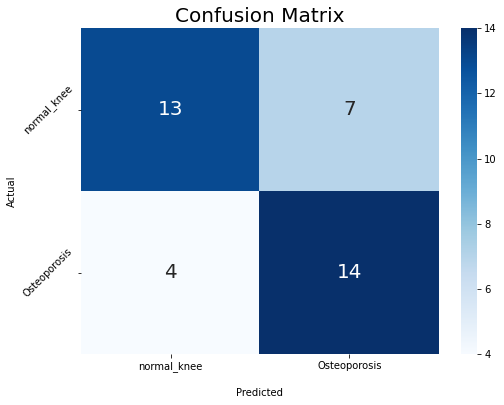




              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.67      0.78      0.72        18

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



In [ ]:
#CNN structure 1
os_cnn_model = CNN_Structure_1(train_os_l,"relu")
os_history = CNN_Model(os_cnn_model,train_os,train_os_l,valid_os,valid_os_l,20)
acc_plot(os_history)
show_matrix(os_cnn_model,test_os,test_os_l,os_label)
matrix_info(os_cnn_model,test_os,test_os_l)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


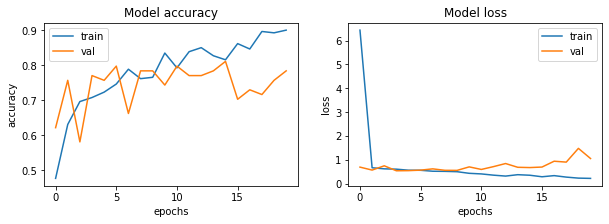

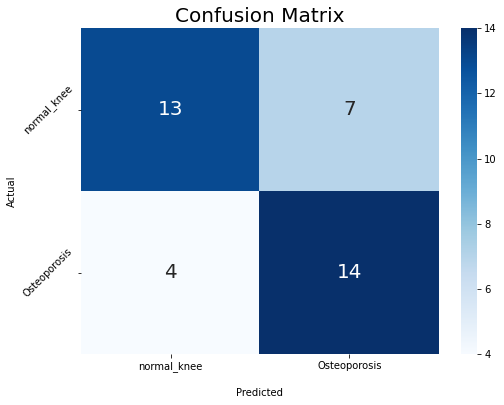




              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.67      0.78      0.72        18

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



In [ ]:
#CNN structure 2
os_cnn_model2 = CNN_Structure_2(train_os_l,"relu")
os_history2 = CNN_Model(os_cnn_model2,train_os,train_os_l,valid_os,valid_os_l,20)
acc_plot(os_history2)
show_matrix(os_cnn_model2,test_os,test_os_l,os_label)
matrix_info(os_cnn_model2,test_os,test_os_l)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


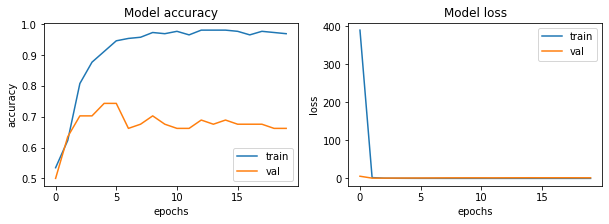

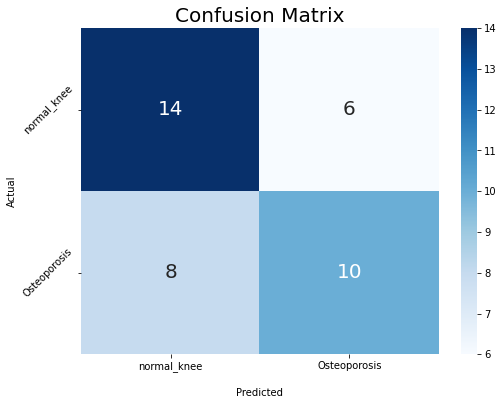




              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.62      0.56      0.59        18

    accuracy                           0.63        38
   macro avg       0.63      0.63      0.63        38
weighted avg       0.63      0.63      0.63        38



In [ ]:
#CNN structure 1
os_cnn_model3 = CNN_Structure_3(train_os_l,"relu")
os_history3 = CNN_Model(os_cnn_model3,train_os,train_os_l,valid_os,valid_os_l,20)
acc_plot(os_history3)
show_matrix(os_cnn_model3,test_os,test_os_l,os_label)
matrix_info(os_cnn_model3,test_os,test_os_l)

###Imbalance class weight method

In [ ]:
os_class_weight=generate_class_weights(train_os_l)
os_class_weight

{0: 1.0077519379844961, 1: 0.9923664122137404}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


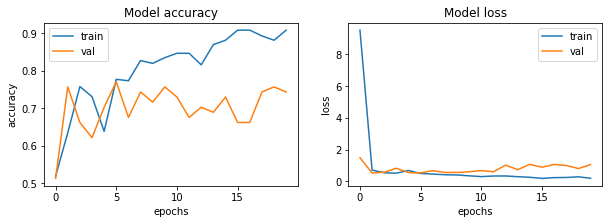

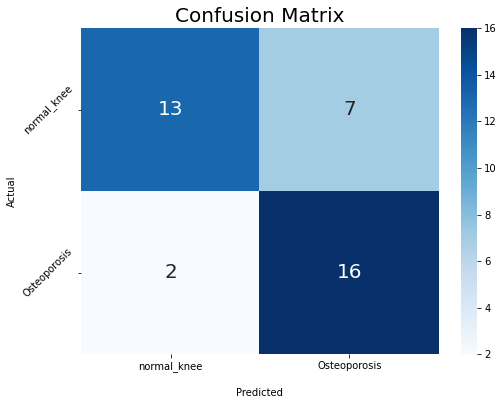




              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       0.70      0.89      0.78        18

    accuracy                           0.76        38
   macro avg       0.78      0.77      0.76        38
weighted avg       0.79      0.76      0.76        38



In [ ]:
os_cnn_model_w = CNN_Structure_1(train_os_l,"relu")
os_history_w = CNN_Model_w(os_cnn_model_w,train_os,train_os_l,valid_os,valid_os_l,20,os_class_weight)
acc_plot(os_history_w)
show_matrix(os_cnn_model_w,test_os,test_os_l,os_label)
matrix_info(os_cnn_model_w,test_os,test_os_l)

### CNN structure 1 + class weight EPOCH comparison

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


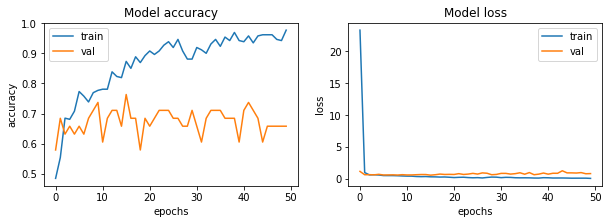

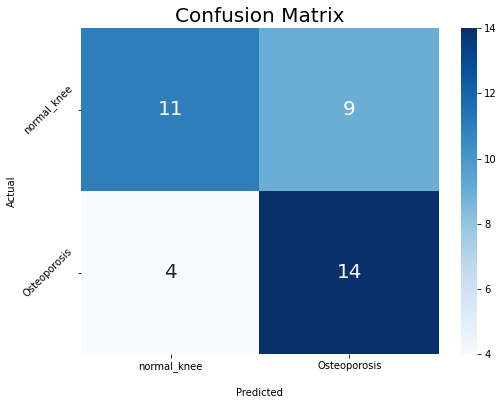




              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.61      0.78      0.68        18

    accuracy                           0.66        38
   macro avg       0.67      0.66      0.66        38
weighted avg       0.67      0.66      0.65        38



In [ ]:
#CNN structure 1 with os + weight Epoch 50
osw_cnn_model_e50 = CNN_Structure_1(train_os_l,"relu")
osw_history_e50 = CNN_Model_w(osw_cnn_model_e50,train_os,train_os_l,test_os,test_os_l,50,os_class_weight)
acc_plot(osw_history_e50)
show_matrix(osw_cnn_model_e50,test_os,test_os_l,os_label)
matrix_info(osw_cnn_model_e50,test_os,test_os_l)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


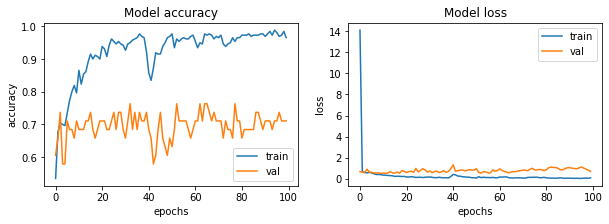

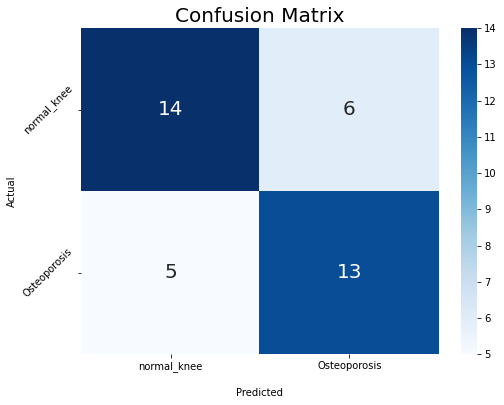




              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.68      0.72      0.70        18

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



In [ ]:
#CNN structure 1 with os + weight Epoch 100
osw_cnn_model_e100 = CNN_Structure_1(train_os_l,"relu")
osw_history_e100 = CNN_Model_w(osw_cnn_model_e100,train_os,train_os_l,test_os,test_os_l,100,os_class_weight)
acc_plot(osw_history_e100)
show_matrix(osw_cnn_model_e100,test_os,test_os_l,os_label)
matrix_info(osw_cnn_model_e100,test_os,test_os_l)

##VGG16 Section


In [ ]:
os,os_l=data_separate_label(os_data,os_label,224)

In [ ]:
train_os,train_os_l,valid_os,valid_os_l,test_os,test_os_l=train_test_valid_split(os,os_l, True)

In [ ]:
os_class_weight=generate_class_weights(train_os_l)
os_class_weight

{0: 1.0077519379844961, 1: 0.9923664122137404}

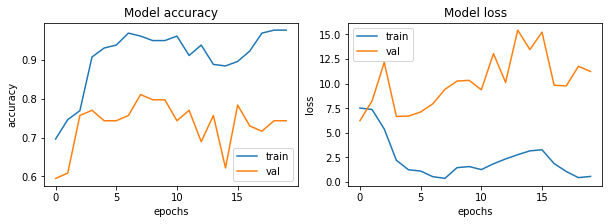

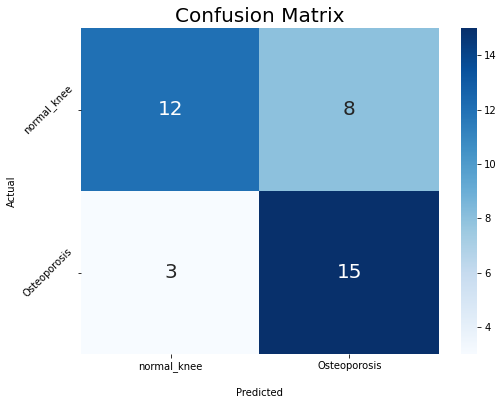




              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.65      0.83      0.73        18

    accuracy                           0.71        38
   macro avg       0.73      0.72      0.71        38
weighted avg       0.73      0.71      0.71        38



In [ ]:
#epoch 20
osw_vgg_model = VGG16(train_os_l)
osw_vgg_history = VGG16_Model_w(osw_vgg_model,train_os, train_os_l,valid_os, valid_os_l,20,os_class_weight)
acc_plot(osw_vgg_history)
show_matrix(osw_vgg_model,test_os,test_os_l,os_label)
matrix_info(osw_vgg_model,test_os,test_os_l)

###VGG16 Epoch comparison

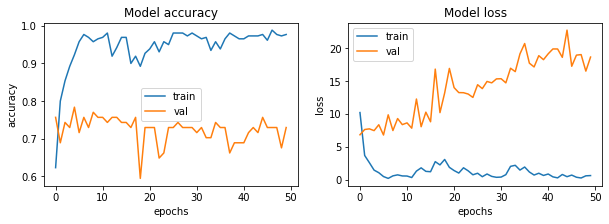

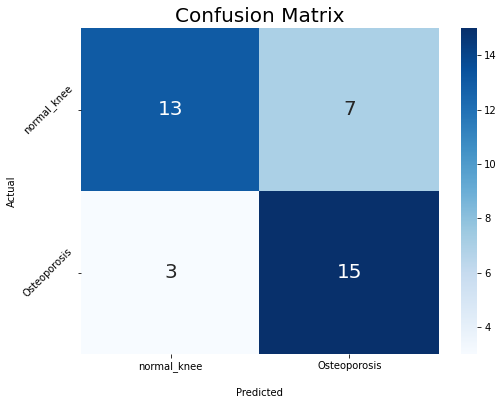




              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.68      0.83      0.75        18

    accuracy                           0.74        38
   macro avg       0.75      0.74      0.74        38
weighted avg       0.75      0.74      0.74        38



In [ ]:
#epoch 50
osw_vgg_model_50 = VGG16(train_os_l)
osw_vgg_history_50 = VGG16_Model_w(osw_vgg_model_50,train_os, train_os_l,valid_os, valid_os_l,50,os_class_weight)
acc_plot(osw_vgg_history_50)
show_matrix(osw_vgg_model_50,test_os,test_os_l,os_label)
matrix_info(osw_vgg_model_50,test_os,test_os_l)

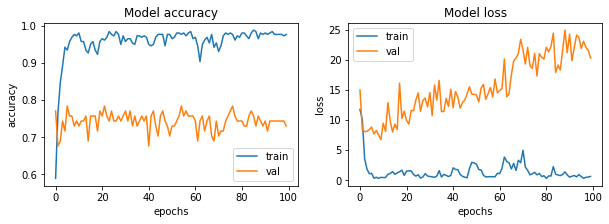

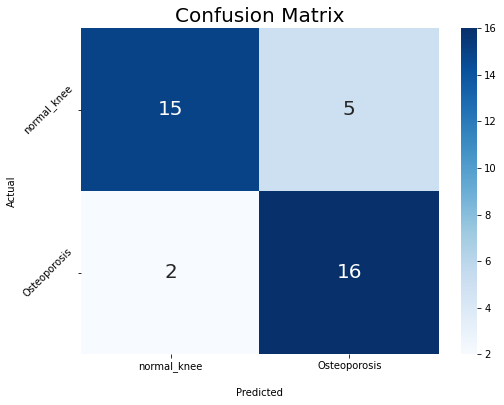




              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.76      0.89      0.82        18

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.83      0.82      0.82        38



In [ ]:
#epoch 100
osw_vgg_model_100 = VGG16(train_os_l)
osw_vgg_history_100 = VGG16_Model_w(osw_vgg_model_100,train_os, train_os_l,valid_os, valid_os_l,100,os_class_weight)
acc_plot(osw_vgg_history_100)
show_matrix(osw_vgg_model_100,test_os,test_os_l,os_label)
matrix_info(osw_vgg_model_100,test_os,test_os_l)

##Late-Fusion section


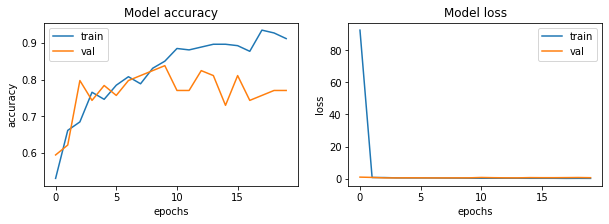

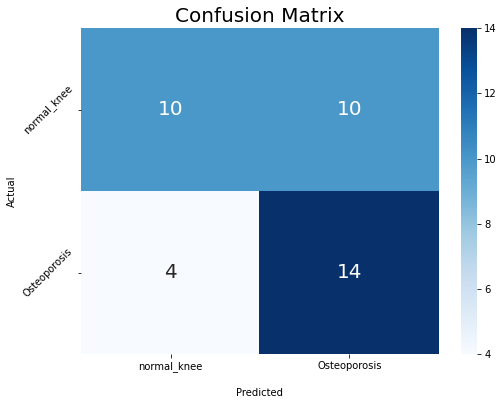




              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.58      0.78      0.67        18

    accuracy                           0.63        38
   macro avg       0.65      0.64      0.63        38
weighted avg       0.65      0.63      0.63        38



In [ ]:
os_fusion_model = Fusion_CNN_VGG16(train_os_l)
os_fusion_history = Fusion_model_w(os_fusion_model ,train_os, train_os_l,valid_os, valid_os_l,20,os_class_weight)
acc_plot(os_fusion_history)
show_matrix(os_fusion_model,[test_os,test_os],test_os_l,os_label)
matrix_info(os_fusion_model,[test_os,test_os],test_os_l)

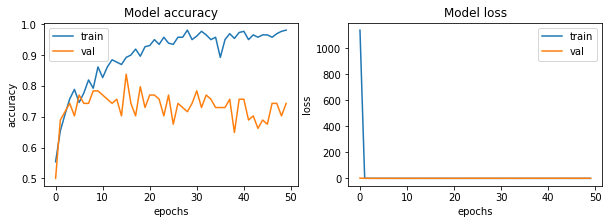

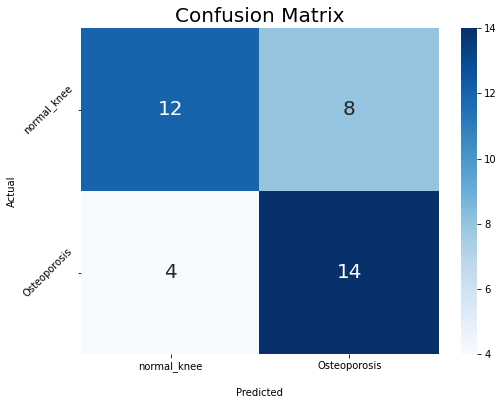




              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.64      0.78      0.70        18

    accuracy                           0.68        38
   macro avg       0.69      0.69      0.68        38
weighted avg       0.70      0.68      0.68        38



In [ ]:
#Epoch 50
os_fusion_model_50 = Fusion_CNN_VGG16(train_os_l)
os_fusion_history_50 = Fusion_model_w(os_fusion_model_50 ,train_os, train_os_l,valid_os, valid_os_l,50,os_class_weight)
acc_plot(os_fusion_history_50)
show_matrix(os_fusion_model_50,[test_os,test_os],test_os_l,os_label)
matrix_info(os_fusion_model_50,[test_os,test_os],test_os_l)

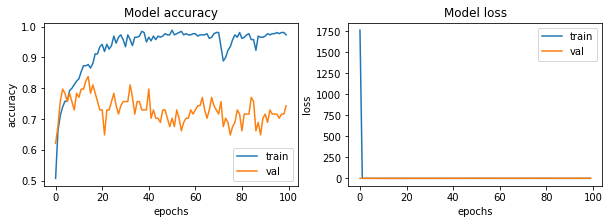

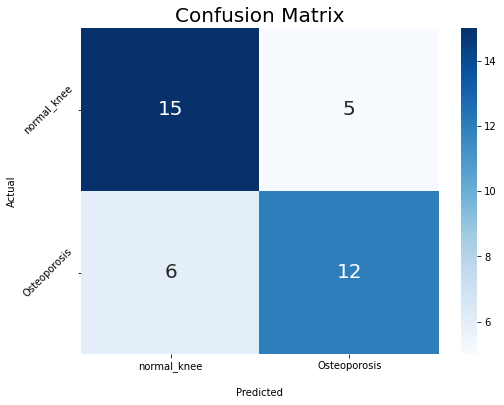




              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.71      0.67      0.69        18

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



In [ ]:
#Epoch 100
os_fusion_model_100 = Fusion_CNN_VGG16(train_os_l)
os_fusion_history_100 = Fusion_model_w(os_fusion_model_100 ,train_os, train_os_l,valid_os, valid_os_l,100,os_class_weight)
acc_plot(os_fusion_history_100)
show_matrix(os_fusion_model_100,[test_os,test_os],test_os_l,os_label)
matrix_info(os_fusion_model_100,[test_os,test_os],test_os_l)